In [2]:
##### Imports ######
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as DataFrame

# 1.4.1 #

In [3]:
df = pd.read_csv(".\clustering-tendency.csv", header =None)
print(df.where(df<0))
print(df.where(df>1))
df.head()

      0   1   2
0   NaN NaN NaN
1   NaN NaN NaN
2   NaN NaN NaN
3   NaN NaN NaN
4   NaN NaN NaN
..   ..  ..  ..
995 NaN NaN NaN
996 NaN NaN NaN
997 NaN NaN NaN
998 NaN NaN NaN
999 NaN NaN NaN

[1000 rows x 3 columns]
      0   1   2
0   NaN NaN NaN
1   NaN NaN NaN
2   NaN NaN NaN
3   NaN NaN NaN
4   NaN NaN NaN
..   ..  ..  ..
995 NaN NaN NaN
996 NaN NaN NaN
997 NaN NaN NaN
998 NaN NaN NaN
999 NaN NaN NaN

[1000 rows x 3 columns]


<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\stefa\AppData\Local\Temp\ipykernel_372\442444155.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv(".\clustering-tendency.csv", header =None)


,0,1,2
0,0.964680,0.351274,0.298323
1,0.585918,0.800970,0.187782
2,0.509113,0.280177,0.208792
3,0.352107,0.665974,0.046316
4,0.363669,0.323479,0.219902


# 1.4.2 #

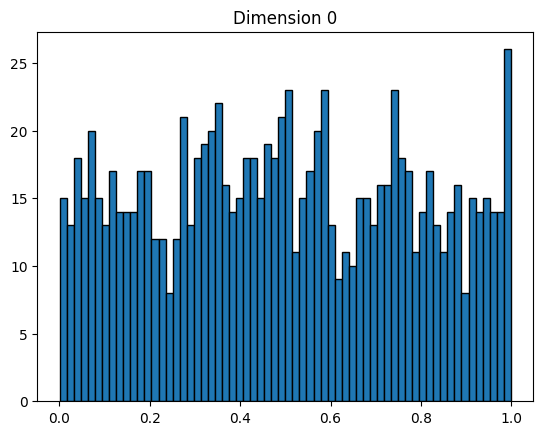

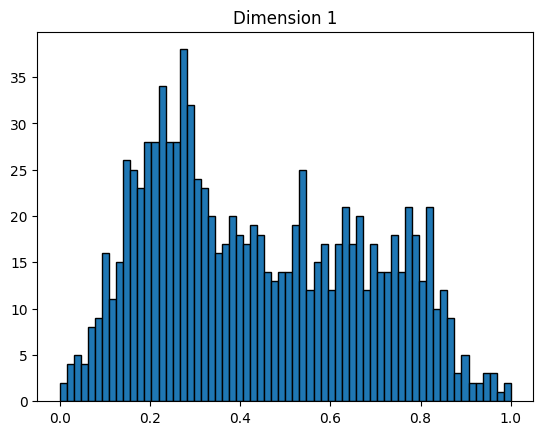

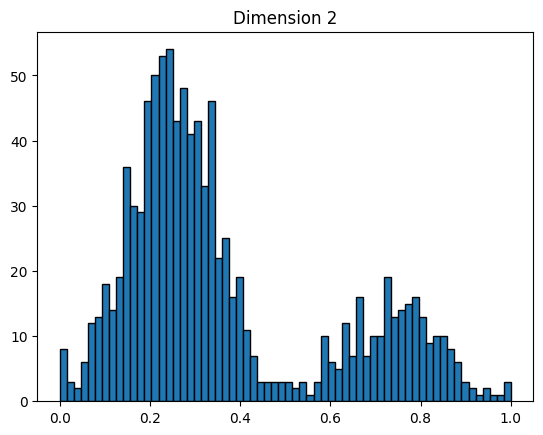

In [4]:
for i in range(0,3):    
    plt.hist(
        df[i],
        bins = 64,
        edgecolor='black',
        histtype='bar'
        )
    plt.title(f'Dimension {i}')
    plt.show()

# 1.4.3 #

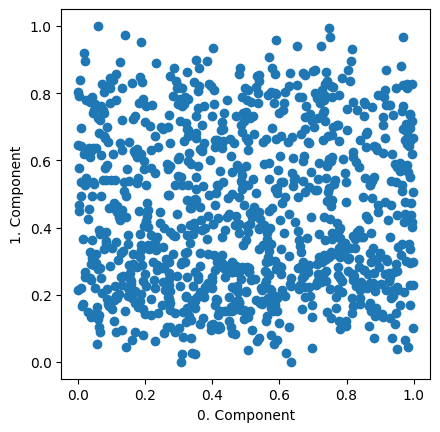

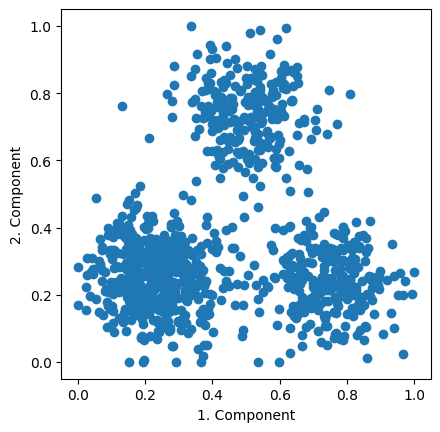

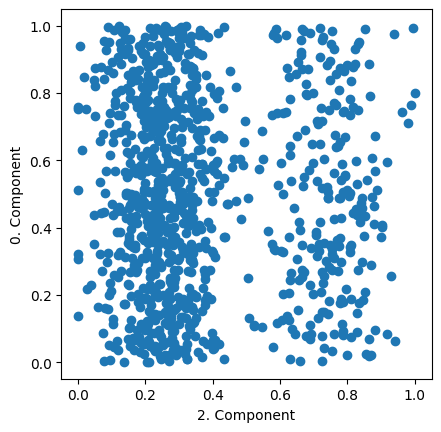

In [5]:
for i in range(0,3):
    plt.scatter(
        df[i],
        df[(i+1)%3],
    )
    plt.xlabel(f"{i}. Component")
    plt.ylabel(f"{(i+1)%3}. Component")
    plt.gca().set_aspect('equal')
    plt.show()

# 1.4.4 #

In [6]:
import math
from itertools import combinations

pairs = list(combinations(range(0,len(df)), 2))
distances = [[0.0 for _ in range(0,len(pairs))] for __ in range(0,6)]
for k in range(0,3):
    for i in range(0,len(pairs)):
    # row_1 = df.iloc[pairs[i][0]]
    # row_2 = df.iloc[pairs[i][1]]
        row_1 = [df[k][pairs[i][0]].tolist()]
        row_2 = [df[k][pairs[i][1]].tolist()]

        dist = math.dist(row_1, row_2)
        distances[k][i] += dist
    print(len(distances[k]))
    for j in range(0,len(pairs)):
        df_1_out = df.drop(k, axis = 1)
        row_1 = df_1_out.iloc[pairs[j][0]]
        row_2 = df_1_out.iloc[pairs[j][1]]

        dist = math.dist(row_1, row_2)
        distances[5-k][j] += dist
    print(len(distances[5-k]))




499500
499500
499500


KeyboardInterrupt: 

In [8]:
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

(0,)


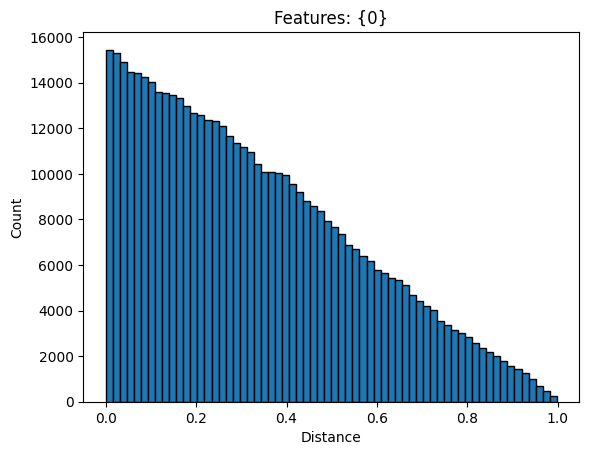

(1,)


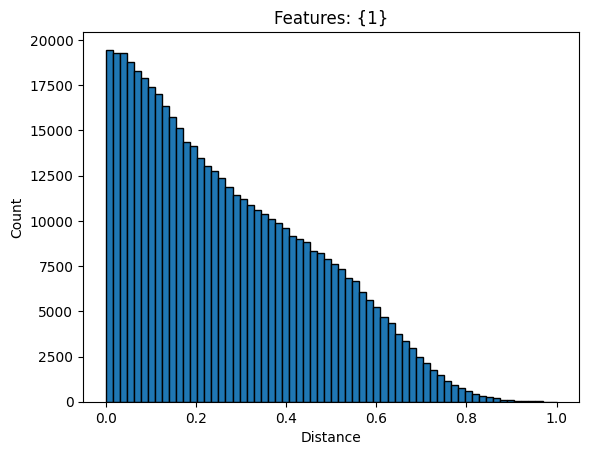

(2,)


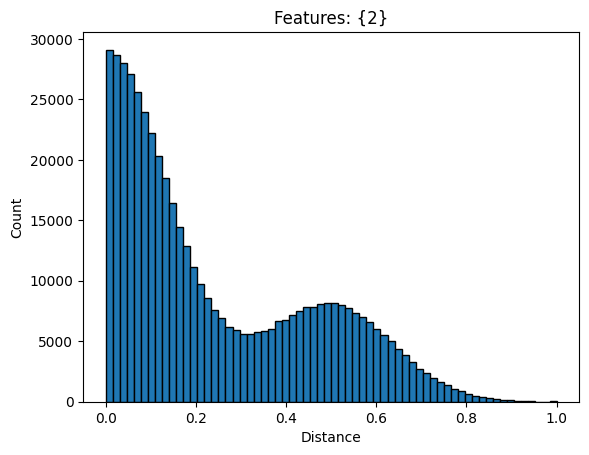

(0, 1)


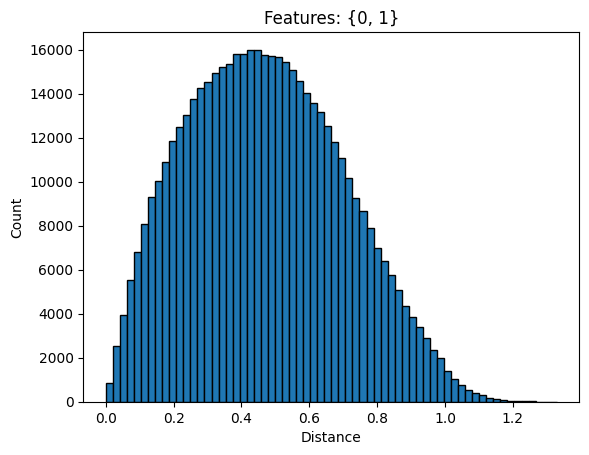

(0, 2)


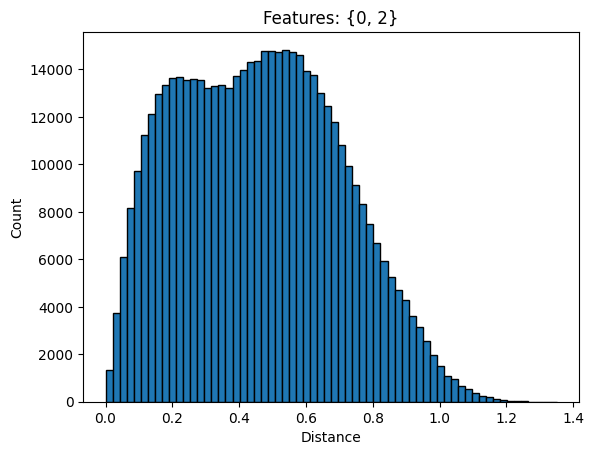

(1, 2)


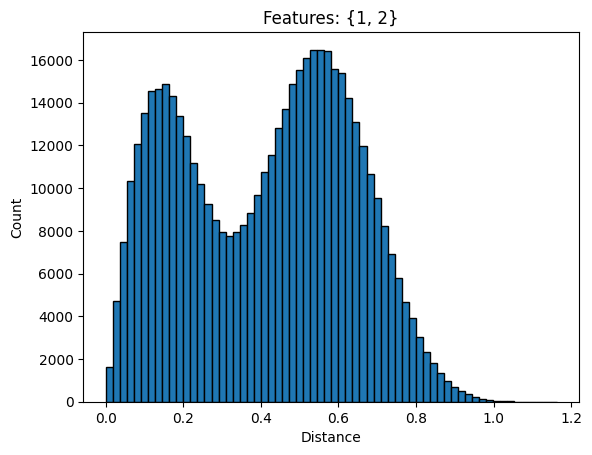

(0, 1, 2)


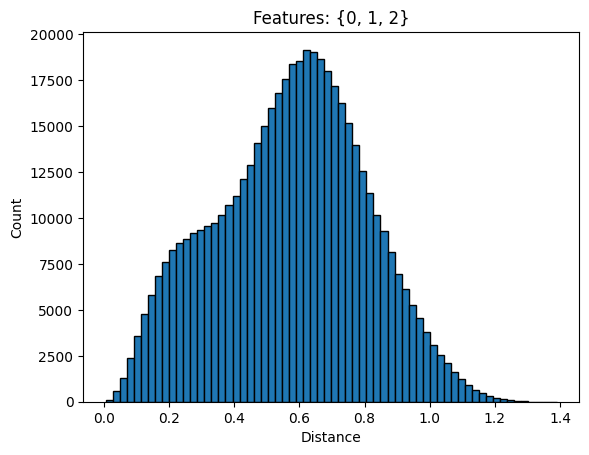

In [ ]:
from scipy.spatial.distance import pdist

for feature_set in powerset([0, 1, 2]):
    if len(feature_set) == 0:
        continue

    df_subset = df[list(feature_set)]
    dists = pdist(df_subset)

    plt.hist(dists, bins=64, edgecolor="black", histtype="bar")
    plt.title(f"Features: {set(feature_set)}")
    plt.xlabel("Distance")
    plt.ylabel("Count")
    plt.show()

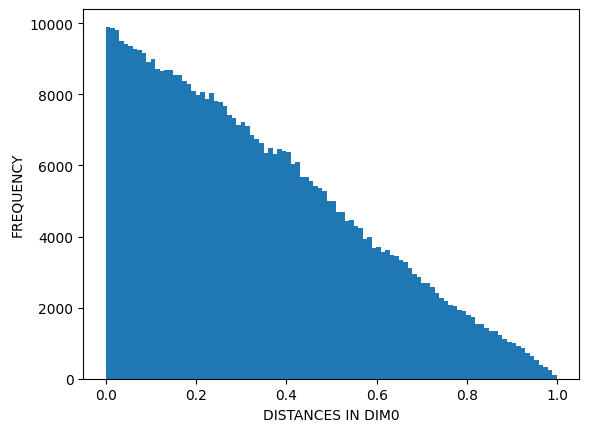

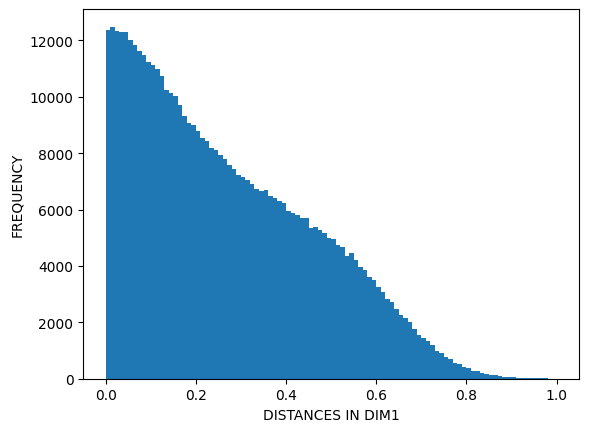

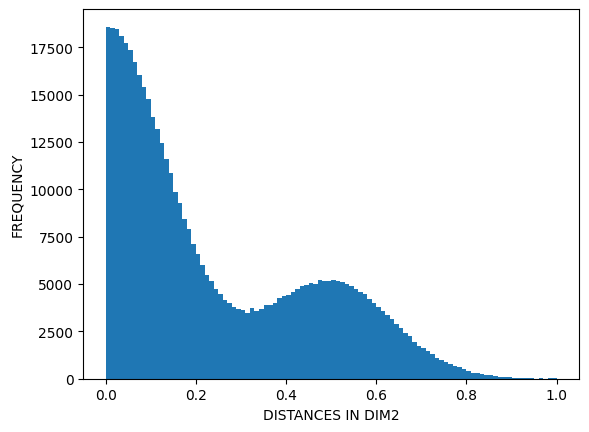

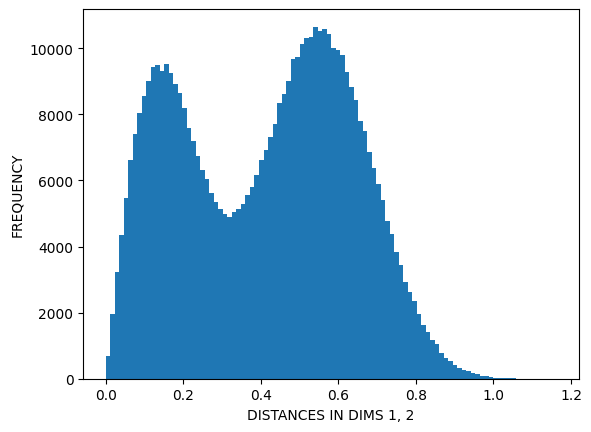

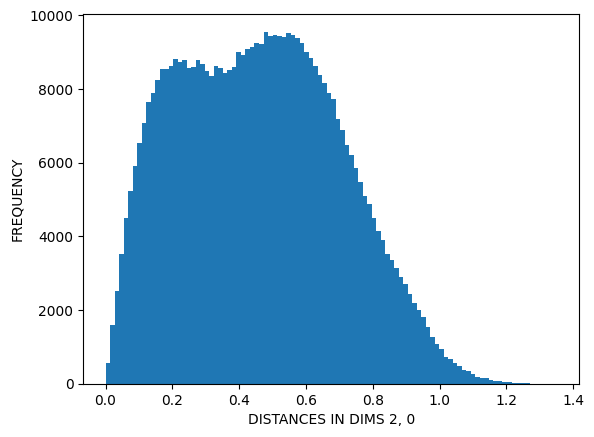

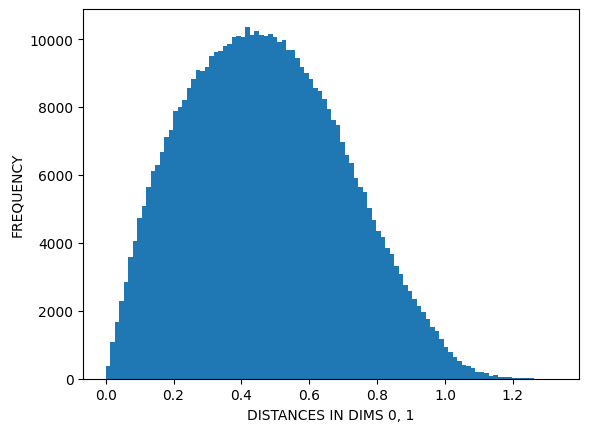

In [ ]:
for i in range(0,3):
    plt.hist(
    distances[i],
    bins = 100,
    )
    plt.xlabel(f"DISTANCES IN DIM{i}")
    plt.ylabel("FREQUENCY")
    plt.show()
for i in range(0,3):
    plt.hist(
    distances[5-i],
    bins = 100,
    )
    plt.xlabel(f"DISTANCES IN DIMS {(i+1)%3}, {(i+2)%3}")
    plt.ylabel("FREQUENCY")
    plt.show()


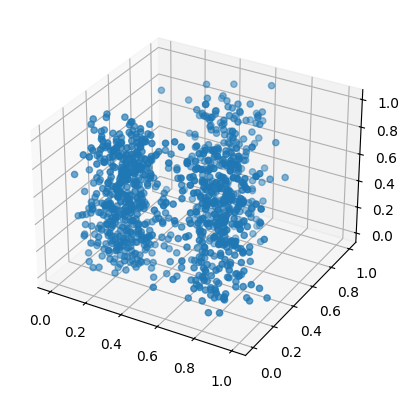

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df[1], df[2], df[0])
plt.show()